# Explore Agriweb data
JTB July 14 2025

Purpose:
Load agriweb paddock data in geopackage format and do some exploratory data analysis



In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import rasterio #
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib
import rioxarray
from shapely.geometry import mapping
import pickle
import os
import shutil

In [2]:
dir = "/g/data/xe2/datasets/Agriweb/"
data_version = "beta_sowing_harvest_2025-05-22"

In [3]:
pol = gpd.read_file(dir+data_version+'.gpkg')


/g/data/xe2/John/geospatenv/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/g/data/xe2/John/geospatenv/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/g/data/xe2/John/geospatenv/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/g/data/xe2/John/geospatenv/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is d

In [28]:
#print(pol)

In [6]:
print(len(pol))

349


In [10]:
print(pol.columns)

Index(['PADDOCK_ID', 'CREATION_DATE', 'LAST_MODIFIED_DATE', 'TITLE',
       'CROP_TYPE', 'PASTURE_STATE', 'LATITUDE', 'LONGITUDE',
       'SOWING_CROP_TYPE', 'SOWING_DATE', 'HARVEST_CROP_TYPE', 'HARVEST_DATE',
       'YIELD_KG_PER_HA', 'geometry'],
      dtype='object')


### Distributions of sow date, harvest date, yield:

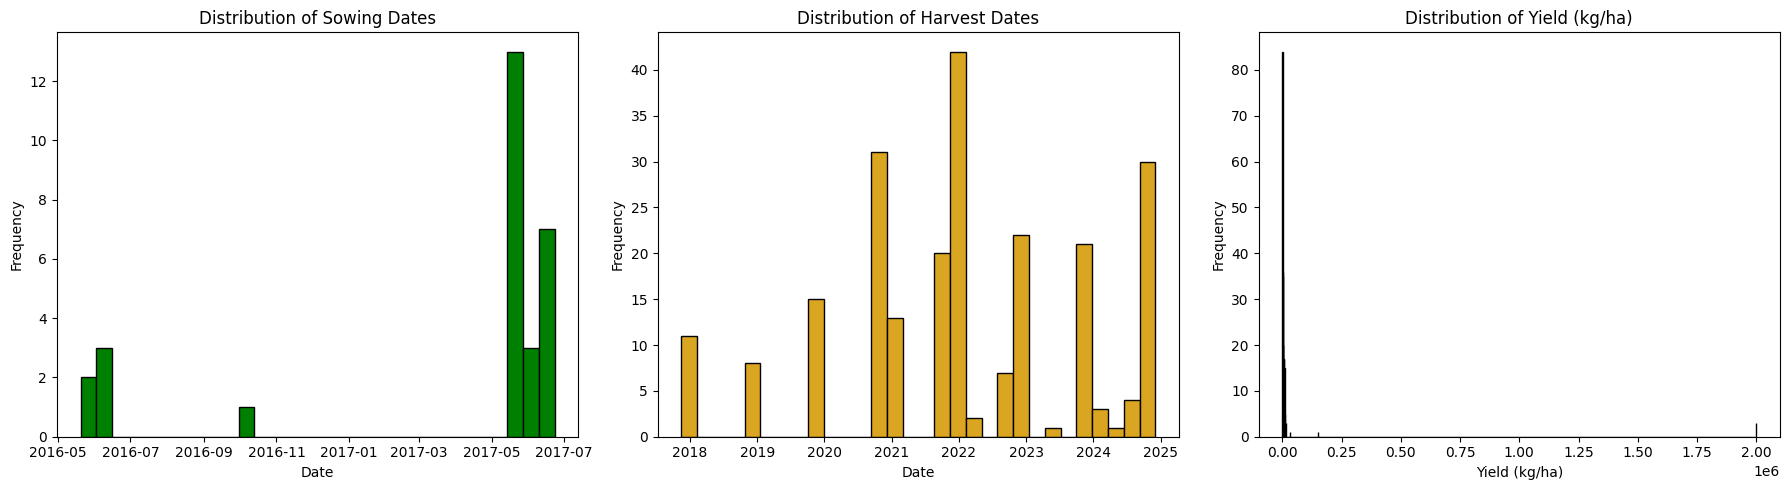

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# set maximum yield and remove if above 
max_yield=20e3

# Ensure datetime columns are parsed correctly
pol['SOWING_DATE'] = pd.to_datetime(pol['SOWING_DATE'], errors='coerce')
pol['HARVEST_DATE'] = pd.to_datetime(pol['HARVEST_DATE'], errors='coerce')

# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot distribution of SOWING_DATE
axs[0].hist(pol['SOWING_DATE'].dropna(), bins=30, color='green', edgecolor='black')
axs[0].set_title('Distribution of Sowing Dates')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Frequency')

# Plot distribution of HARVEST_DATE
axs[1].hist(pol['HARVEST_DATE'].dropna(), bins=30, color='goldenrod', edgecolor='black')
axs[1].set_title('Distribution of Harvest Dates')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Frequency')

# Plot distribution of YIELD_KG_PER_HA
axs[2].hist(pol['YIELD_KG_PER_HA'].dropna(), bins=2000, color='cornflowerblue', edgecolor='black')
axs[2].set_title('Distribution of Yield (kg/ha)')
axs[2].set_xlabel('Yield (kg/ha)')
axs[2].set_ylabel('Frequency')
axs[2].set_xlim(0, max_yield)

plt.tight_layout()
plt.show()


### How many paddocks with sow, harvest dates and yeild?

In [20]:
# Count of paddocks with a non-null sowing date
num_with_sow_date = pol['SOWING_DATE'].notna().sum()

# Count of paddocks with a non-null harvest date
num_with_harvest_date = pol['HARVEST_DATE'].notna().sum()

# Count of paddocks with a non-null yield value
num_with_yield = pol['YIELD_KG_PER_HA'].notna().sum()

num_with_all_three = pol[['SOWING_DATE', 'HARVEST_DATE', 'YIELD_KG_PER_HA']].dropna().shape[0]

print(f"Paddocks with sowing date: {num_with_sow_date}")
print(f"Paddocks with harvest date: {num_with_harvest_date}")
print(f"Paddocks with yield: {num_with_yield}")
print(f"Paddocks with all three values: {num_with_all_three}")


Paddocks with sowing date: 29
Paddocks with harvest date: 231
Paddocks with yield: 286
Paddocks with all three values: 0


In [22]:
### How many canola paddock years?
num_can = pol['HARVEST_CROP_TYPE'].str.contains('can', case=False, na=False).sum()
print(f"Number of rows with 'Can' or 'can' in HARVEST_CROP_TYPE: {num_can}")

Number of rows with 'Can' or 'can' in HARVEST_CROP_TYPE: 15


In [27]:
tmp = pol[pol['HARVEST_CROP_TYPE'].str.contains('can', case=False, na=False)]
#tmp